In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns

sc.logging.print_header()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3  # errors (0), warnings (1), info (2), hints (3)

sns.set_style("white")

scanpy==1.9.6 anndata==0.10.3 umap==0.5.4 numpy==1.26.0 scipy==1.11.3 pandas==2.1.3 scikit-learn==1.3.2 statsmodels==0.14.0 igraph==0.11.2 louvain==0.8.1 pynndescent==0.5.11


In [2]:
adata = sc.read_h5ad('D:/st_projects/data/Stereo/Stereo-seq_Fu2021Unsupervised_StereoSeq_MOB_data.h5ad')
adata

AnnData object with n_obs × n_vars = 19109 × 27106
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

AnnData object with n_obs × n_vars = 19109 × 27106
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mt'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

(6005.190789473684, 12428.6600877193, 9986.774763741741, 15062.302776957435)

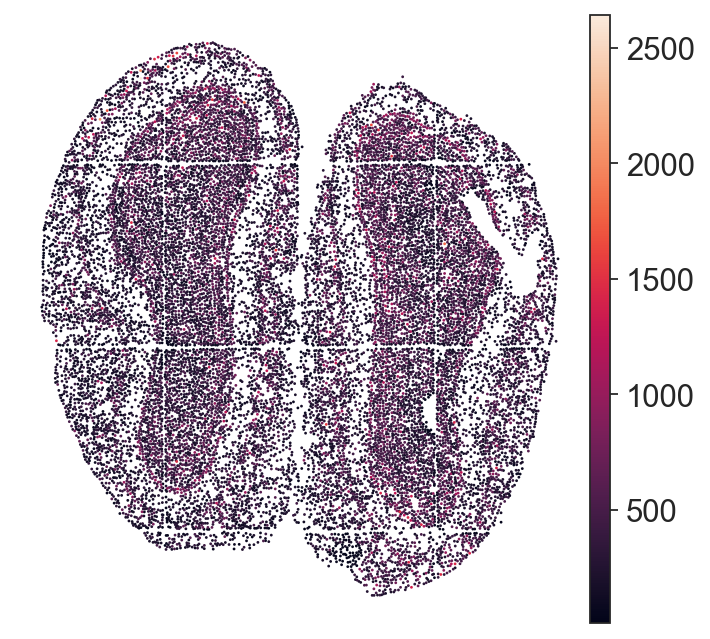

In [3]:
adata.var["mt"] = adata.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)
# sc.pp.calculate_qc_metrics(adata, inplace=True)
display(adata)

plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.embedding(adata, basis="spatial", color="n_genes_by_counts", show=False)
plt.title("")
plt.axis('off')

In [4]:
sc.pp.filter_cells(adata, min_counts=50)
sc.pp.filter_cells(adata, max_counts=2500)
print(f"#cells after count filter: {adata.n_obs}")

adata = adata[adata.obs["pct_counts_mt"] < 20]
print(f"#cells after MT filter: {adata.n_obs}")

adata_log1p = adata.copy()
sc.pp.filter_genes(adata, min_cells=10)
print(f"#genes after minimum cells per gene filter: {adata.n_vars}")

#Normalization
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata, target_sum=1e4, inplace=True)
adata = adata[:, adata.var['highly_variable']]
sc.pp.log1p(adata)
display(adata)

filtered out 265 cells that have less than 50 counts
filtered out 1 cells that have more than 2500 counts
#cells after count filter: 18843
#cells after MT filter: 18843
filtered out 6649 genes that are detected in less than 10 cells
#genes after minimum cells per gene filter: 20457
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)


AnnData object with n_obs × n_vars = 18843 × 3000
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mt', 'n_cells', 'highly_variable_rank', 'variances', 'variances_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'


Median distance to closest cell = 37.559647912926046

Edge weights (distance between cells): median = 37.559647912926046, mode = 39.669834697219954

Edge weights (weights between cells): median = 0.11345228847021499, mode = 0.09156649432063377


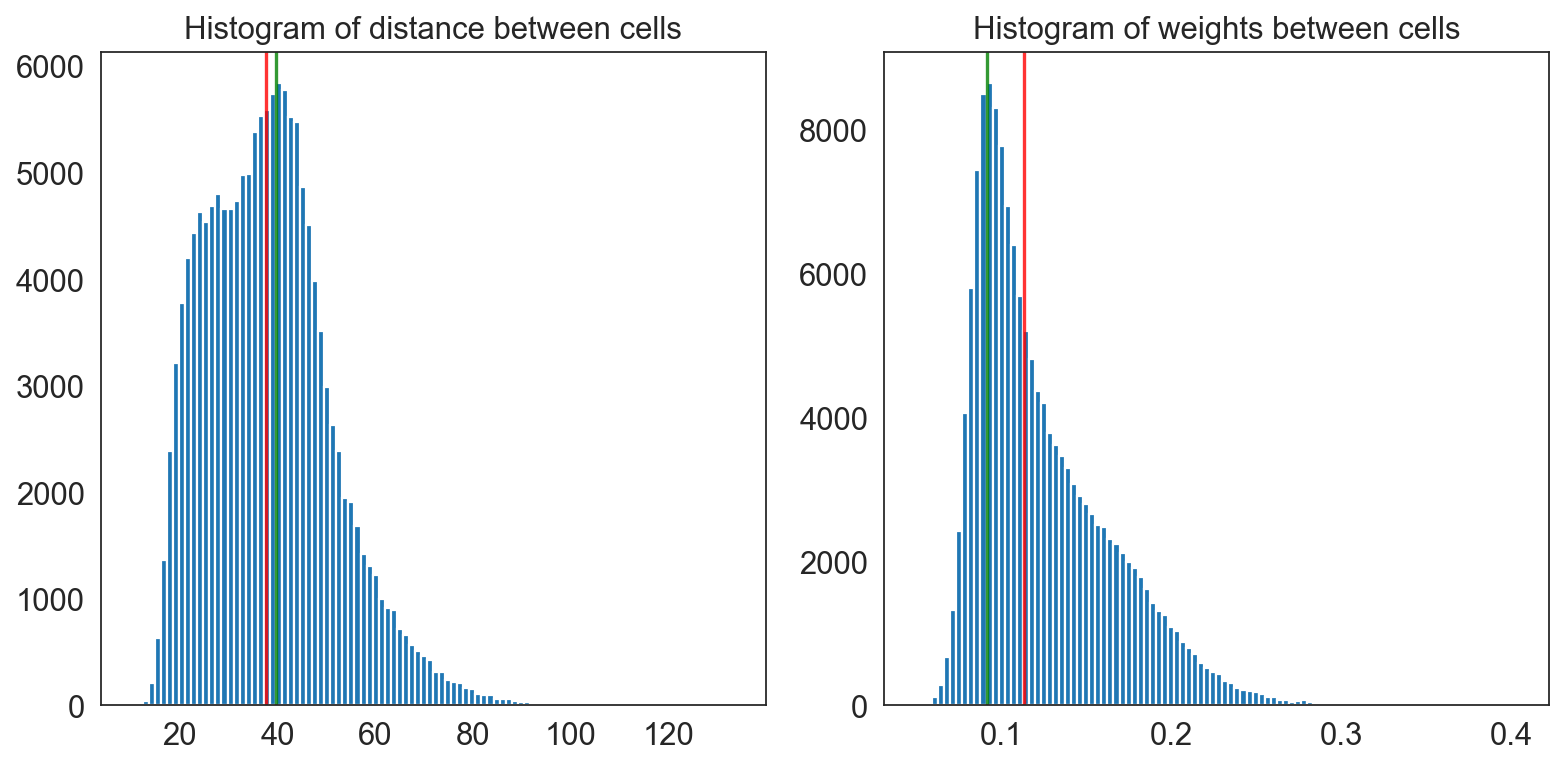

In [5]:
from sklearn.neighbors import NearestNeighbors
from utils import plot_edge_histogram, generate_spatial_weights_fixed_nbrs

num_neighbours = 8
nbrs = NearestNeighbors(algorithm='ball_tree').fit(adata.obsm['spatial'])
distances, indices = nbrs.kneighbors(n_neighbors=num_neighbours)
median_cell_distance = np.median(distances)
print(f"\nMedian distance to closest cell = {median_cell_distance}")

# 将细胞间距离以直方图的形式给出
weights_graph, distance_graph = generate_spatial_weights_fixed_nbrs(adata.obsm['spatial'], num_neighbours=num_neighbours, decay_type='reciprocal', nbr_object=nbrs, verbose=False)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plot_edge_histogram(distance_graph, ax[0], title='distance between cells')
plot_edge_histogram(weights_graph, ax[1], title='weights between cells')
fig.tight_layout()

In [6]:
from scipy import sparse
from utils import weighted_concatenate, zscore, matrix_to_adata

gene_list = adata.var.index

nbrhood_contribution = 0.2

neighbour_agg_matrix = weights_graph @ adata.X

if sparse.issparse(adata.X):
    concatenated = sparse.hstack((adata.X, neighbour_agg_matrix), )
else:
    concatenated = np.concatenate((adata.X, neighbour_agg_matrix), axis=1,)

matrix = weighted_concatenate(zscore(adata.X, axis=0), zscore(neighbour_agg_matrix, axis=0), nbrhood_contribution)


if sparse.issparse(matrix):
    st_dev_pergene = matrix.toarray().std(axis=0)
else:
    st_dev_pergene = matrix.std(axis=0)

enhanced_data = matrix_to_adata(matrix, adata)
display(enhanced_data)

num_nbrs: 3000


AnnData object with n_obs × n_vars = 18843 × 6000
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mt', 'n_cells', 'highly_variable_rank', 'variances', 'variances_norm', 'is_nbr'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'

In [7]:
sc.pp.pca(enhanced_data, n_comps=15)
low_dim_x = enhanced_data.obsm['X_pca']

computing PCA
    on highly variable genes
    with n_comps=15
    finished (0:00:08)


In [8]:
from sklearn.metrics.pairwise import cosine_similarity

n_spot = low_dim_x.shape[0]
n_neighbor = 30
init_W = cosine_similarity(low_dim_x)
cos_init = np.zeros((n_spot, n_spot))
for i in range(n_spot):
    vec = init_W[i, :]
    distance = vec.argsort()[:: -1]
    for t in range(n_neighbor + 1):
        y = distance[t]
        cos_init[i, y] = init_W[i, y]

In [9]:
# First, we convert the numpy data into tensor
from MNMST_gpu import sparse_self_representation_torch, MNMST_representation_gpu
import torch

device = torch.device('cuda') if torch.cuda.is_available() else 'cpu'
cos_init_tensor = torch.from_numpy(cos_init).float().to(device)
x_tensor = torch.from_numpy(low_dim_x.T).to(device)

C_gpu = sparse_self_representation_torch(x_tensor, init_w=cos_init_tensor, alpha=1., beta=1., device=device)

# Epoch 99, loss: 139.889: 100%|██████████| 100/100 [01:27<00:00,  1.14it/s]


In [10]:
spatia_init_tensor = torch.from_numpy(weights_graph.A).float().to(device)
Z_gpu = MNMST_representation_gpu(C_gpu, spatia_init_tensor, device=device)

# Epoch 19, loss: 0.094:  20%|██        | 20/100 [00:39<02:37,  1.97s/it]


In [11]:
torch.cuda.empty_cache()
Z_gpu = Z_gpu.detach().cpu().numpy()

### We notice 'Leiden' implemented by SCANPY will result in extremely large memory consumption on dense graphs, therefore, we propose to use spectral clustering as an alternative.

In [12]:
from sklearn.cluster import SpectralClustering

n_clusters = 7  # 你可以根据需要设置聚类的数量
spectral = SpectralClustering(n_clusters=n_clusters, affinity='precomputed')
labels = spectral.fit_predict(Z_gpu)

enhanced_data.obs['spe_pred'] = labels
enhanced_data.obs["spe_pred"] = enhanced_data.obs["spe_pred"].astype('int')
enhanced_data.obs['spe_pred'] = enhanced_data.obs['spe_pred'].astype('category')

(6005.190789473684, 12428.6600877193, 9986.774763741741, 15062.302776957435)

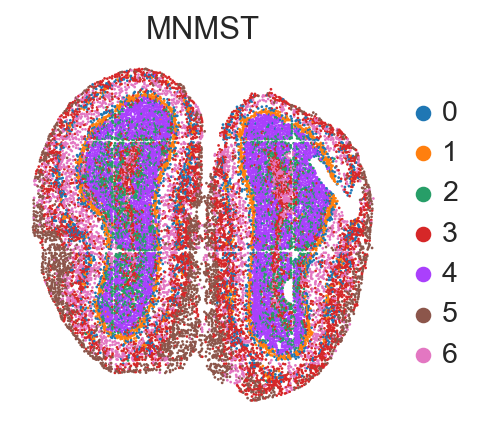

In [13]:
plt.rcParams["figure.figsize"] = (3, 3)
sc.pl.embedding(enhanced_data, basis="spatial", color="spe_pred", s=6, show=False, title='MNMST')
plt.axis('off')

### We also provide the Leiden result on MNMST learned affinity graph

In [14]:
key_added = 'representation'
conns_key = 'representation'
dists_key = 'representation'

enhanced_data.uns[key_added] = {}

representation_dict = enhanced_data.uns[key_added]

representation_dict['connectivities_key'] = conns_key
representation_dict['distances_key'] = dists_key
representation_dict['var_names_use'] = enhanced_data.var_names.to_numpy()

representation_dict['params'] = {}
representation_dict['params']['method'] = 'umap'
enhanced_data.obsp['representation'] = Z_gpu

In [17]:
sc.tl.leiden(enhanced_data, neighbors_key='representation', resolution=0.8, key_added='MNMST_GPU')
print(enhanced_data.obs['MNMST_GPU'])

running Leiden clustering
    finished: found 7 clusters and added
    'MNMST_GPU', the cluster labels (adata.obs, categorical) (0:00:03)
Spot_1        2
Spot_10       2
Spot_100      2
Spot_1000     1
Spot_10000    2
             ..
Spot_9994     2
Spot_9995     2
Spot_9996     2
Spot_9998     1
Spot_9999     2
Name: MNMST_GPU, Length: 18843, dtype: category
Categories (7, object): ['0', '1', '2', '3', '4', '5', '6']


(6005.190789473684, 12428.6600877193, 9986.774763741741, 15062.302776957435)

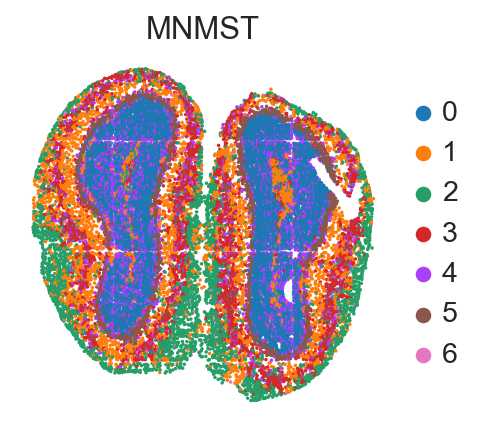

In [18]:
plt.rcParams["figure.figsize"] = (3, 3)
sc.pl.embedding(enhanced_data, basis="spatial", color="MNMST_GPU", s=10, show=False, title='MNMST')
plt.axis('off')